<a href="https://colab.research.google.com/github/Moaz-Eid13/COMPASS-2nd-Assignment-SoM-ver.-/blob/main/COMPASS%20(II).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1: Infinity

#### First: Forward Euler method:

[-1.26675456 -1.23590699 -1.18721571 ...  0.40668469  0.40668468
  0.40668468]
[-1.28714255 -1.2871406  -1.28713865 ... -0.81157305 -0.8115715
 -0.81156996]
[-1.38777878e-17 -9.81917885e-03 -2.87908471e-02 ... -2.04360359e-02
 -2.04360379e-02 -2.04360399e-02]
[-1.11022302e-16 -9.98543529e-09 -2.99562770e-08 ... -5.91167941e-04
 -5.92364232e-04 -5.93559191e-04]


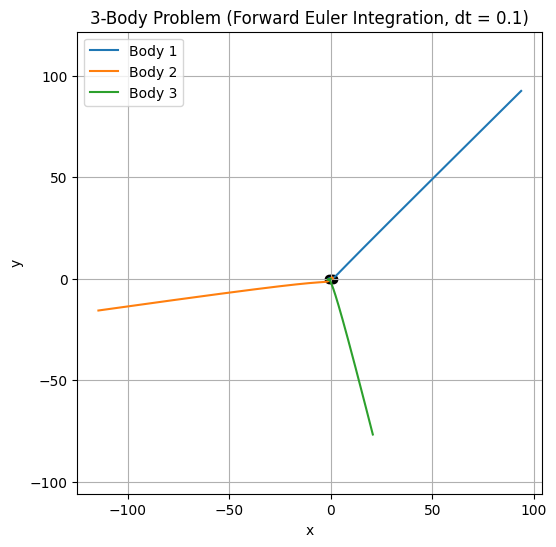

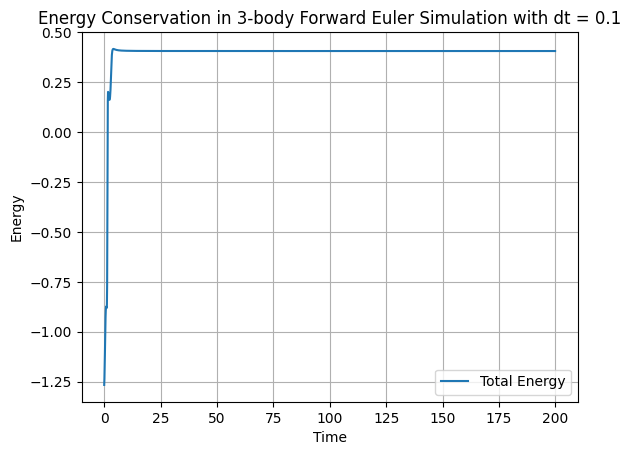

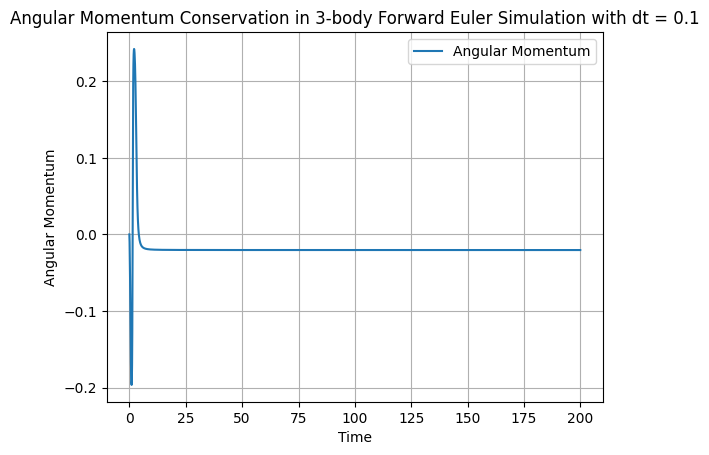

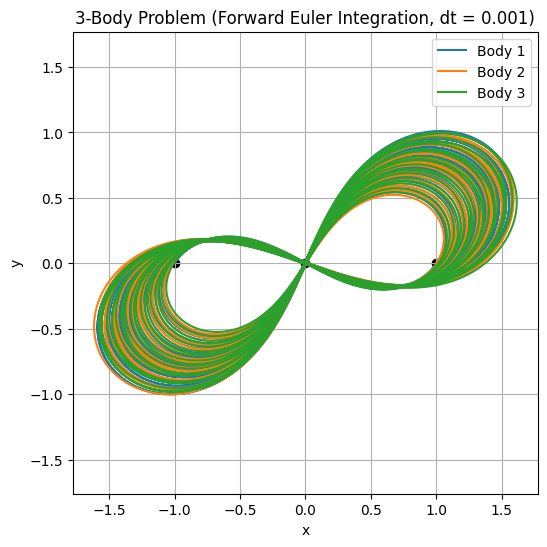

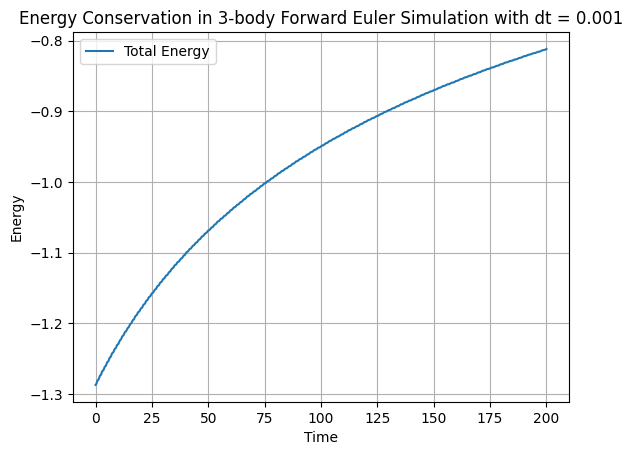

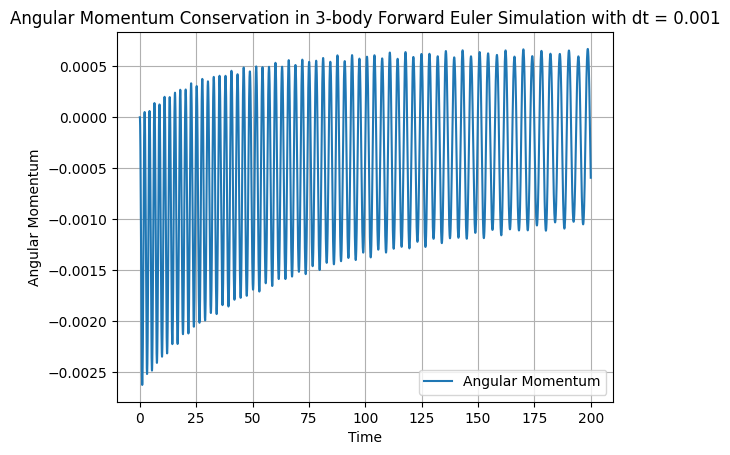

In [3]:
import numpy as np
import matplotlib.pyplot as plt

G = 1
T = 200
dt = np.array([0.1, 0.001])
steps = np.array([int(T/dt[0]), int(T/dt[1])])
p1, p2 = 0.347111, 0.532728
m = np.full(3, 1.0)
r_0 = np.array([[-1.0, 0.0], [1.0, 0.0], [0.0, 0.0]])
r_history1 = np.zeros((3, steps[0], 2), dtype=float)
r_history2 = np.zeros((3, steps[1], 2), dtype=float)
v_0 = np.array([[p1, p2], [p1, p2], [-2*p1, -2*p2]])
def acceleration(r, m):
    acc = np.zeros((3, 2), dtype=float)
    for i in range(3):
        for j in range(3):
            if i != j:
                r_vec = r[j] - r[i]
                dist = np.sqrt(r_vec[0]**2 + r_vec[1]**2)
                if dist > 0:
                    acc[i] += G * m[j] * r_vec / dist**3
    return acc
p = m[0] * v_0[0] + m[1] * v_0[1] + m[2] * v_0[2]
v_com = p / np.sum(m)
v_0 -= v_com
E_history1 = np.zeros(steps[0])
L_history1 = np.zeros(steps[0])
E_history2 = np.zeros(steps[1])
L_history2 = np.zeros(steps[1])

def total_energy(r, v, m):
    T = 0.5 * np.sum(m[:, None] * np.sum(v*v, axis=1, keepdims=True))
    U = 0.0
    N = len(m)
    for i in range(N):
        for j in range(i+1, N):
            U -= G * m[i] * m[j] / np.linalg.norm(r[i] - r[j])
    return T + U

def total_angular_momentum(r, v, m):
    cross_terms = r[:,0]*v[:,1] - r[:,1]*v[:,0]
    L = np.sum(m * cross_terms)
    return L

r = r_0.copy()
v = v_0.copy()
a = acceleration(r, m)

# --- Forward Euler integration --- [0]
for i in range(steps[0]):
    r = r + v * dt[0]
    v = v + a * dt[0]
    a = acceleration(r, m)
    r_history1[:, i, :] = r
    E_history1[i] = total_energy(r, v, m)
    L_history1[i] = total_angular_momentum(r, v, m)

r = r_0.copy()
v = v_0.copy()
a = acceleration(r, m)

# --- Forward Euler integration --- [1]
for i in range(steps[1]):
    r = r + v * dt[1]
    v = v + a * dt[1]
    a = acceleration(r, m)
    r_history2[:, i, :] = r
    E_history2[i] = total_energy(r, v, m)
    L_history2[i] = total_angular_momentum(r, v, m)

time = [np.arange(steps[i]) * dt[i] for i in range(len(dt))]

print(E_history1)
print(E_history2)
print(L_history1)
print(L_history2)

plt.figure(figsize=(6,6))
for i in range(3):
    plt.plot(r_history1[i, :, 0], r_history1[i, :, 1], label=f'Body {i+1}')
    plt.scatter(r_history1[i, 0, 0], r_history1[i, 0, 1], marker='o', c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('3-Body Problem (Forward Euler Integration, dt = 0.1)')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()
plt.figure()
plt.plot(time[0], E_history1, label="Total Energy")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Energy Conservation in 3-body Forward Euler Simulation with dt = 0.1")
plt.grid()
plt.legend()
plt.show()
plt.figure()
plt.plot(time[0], L_history1, label="Angular Momentum")
plt.xlabel("Time")
plt.ylabel("Angular Momentum")
plt.title("Angular Momentum Conservation in 3-body Forward Euler Simulation with dt = 0.1")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
for i in range(3):
    plt.plot(r_history2[i, :, 0], r_history2[i, :, 1], label=f'Body {i+1}')
    plt.scatter(r_history2[i, 0, 0], r_history2[i, 0, 1], marker='o', c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('3-Body Problem (Forward Euler Integration, dt = 0.001)')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()
plt.figure()
plt.plot(time[1], E_history2, label="Total Energy")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Energy Conservation in 3-body Forward Euler Simulation with dt = 0.001")
plt.grid()
plt.legend()
plt.show()
plt.figure()
plt.plot(time[1], L_history2, label="Angular Momentum")
plt.xlabel("Time")
plt.ylabel("Angular Momentum")
plt.title("Angular Momentum Conservation in 3-body Forward Euler Simulation with dt = 0.001")
plt.grid()
plt.legend()
plt.show()

#### Second: Runge-Kutta $2^{\text{nd}}$ order (RK2)

[-1.28622181 -1.28212152 -1.27610786 ...  0.73762681  0.73762671
  0.73762663]
[-1.2871445  -1.2871445  -1.28714449 ... -1.28713786 -1.28713787
 -1.28713787]
[-0.00249438 -0.00757488 -0.01271367 ... -0.0564464  -0.05644733
 -0.05644821]
[-2.49636247e-09 -7.48909945e-09 -1.24818648e-08 ...  1.61093499e-06
  1.60647803e-06  1.60201052e-06]


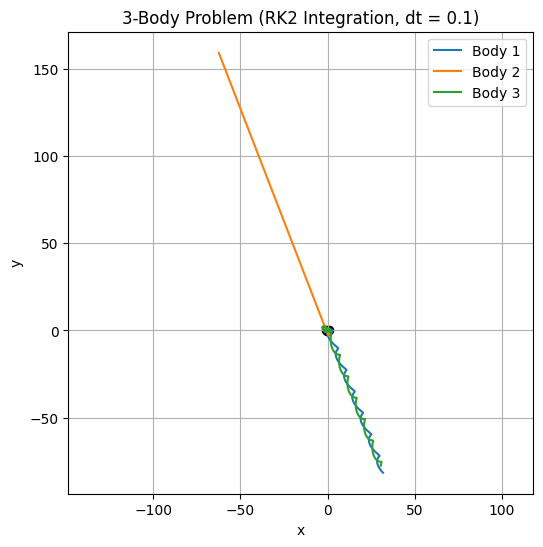

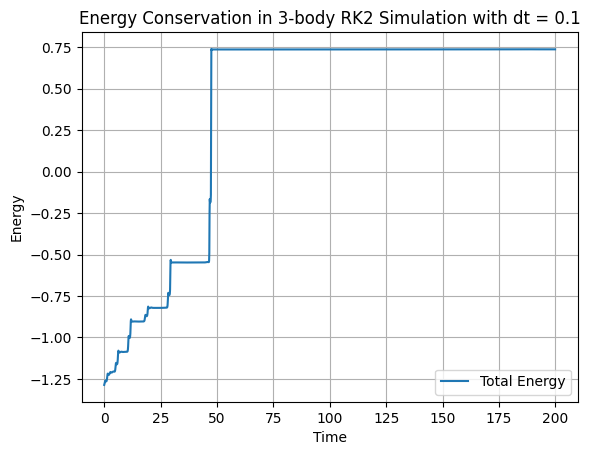

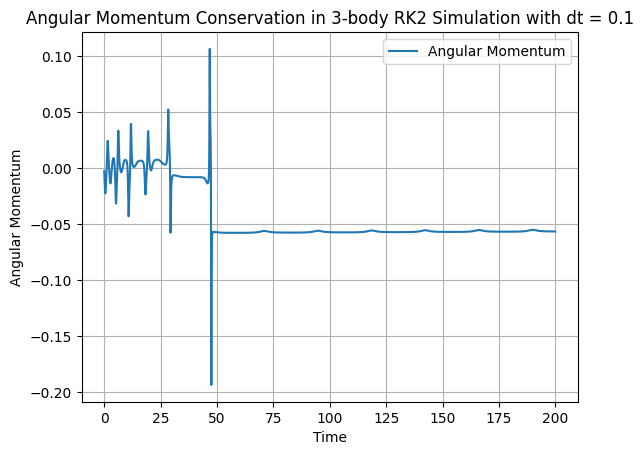

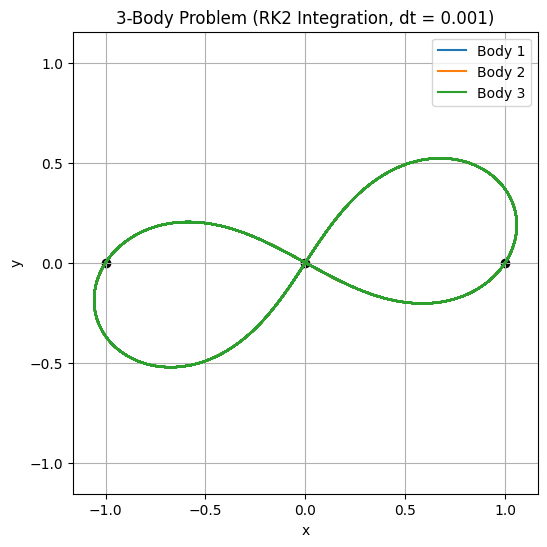

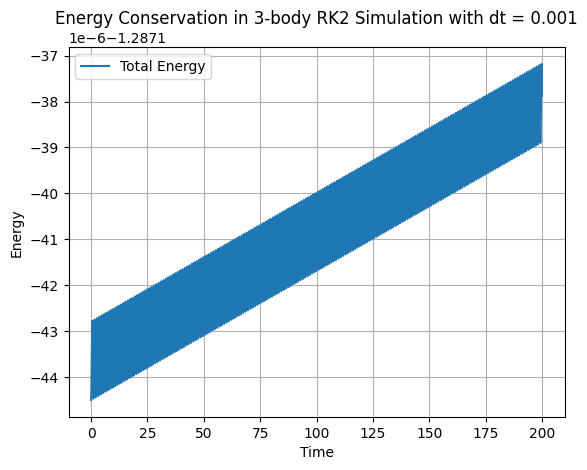

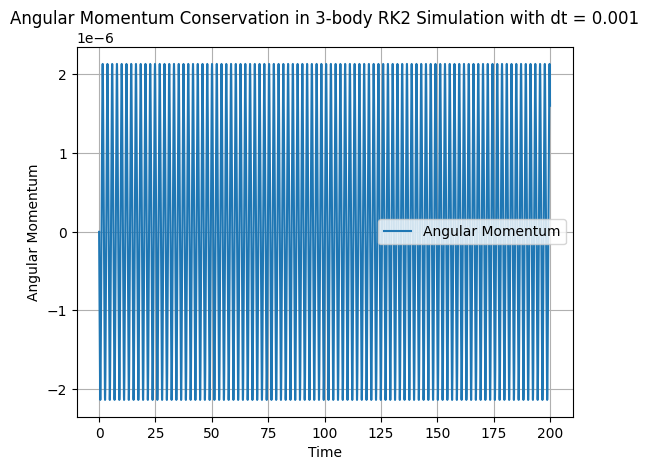

In [4]:
import numpy as np
import matplotlib.pyplot as plt

G = 1
T = 200
dt = np.array([0.1, 0.001])
steps = np.array([int(T/dt[0]), int(T/dt[1])])
p1, p2 = 0.347111, 0.532728
m = np.full(3, 1.0)
r_0 = np.array([[-1.0, 0.0], [1.0, 0.0], [0.0, 0.0]])
r_history1 = np.zeros((3, steps[0], 2), dtype=float)
r_history2 = np.zeros((3, steps[1], 2), dtype=float)
v_0 = np.array([[p1, p2], [p1, p2], [-2*p1, -2*p2]])
def acceleration(r, m):
    acc = np.zeros((3, 2), dtype=float)
    for i in range(3):
        for j in range(3):
            if i != j:
                r_vec = r[j] - r[i]
                dist = np.sqrt(r_vec[0]**2 + r_vec[1]**2)
                if dist > 0:
                    acc[i] += G * m[j] * r_vec / dist**3
    return acc
p = m[0] * v_0[0] + m[1] * v_0[1] + m[2] * v_0[2]
v_com = p / np.sum(m)
v_0 -= v_com
E_history1 = np.zeros(steps[0])
L_history1 = np.zeros(steps[0])
E_history2 = np.zeros(steps[1])
L_history2 = np.zeros(steps[1])

def total_energy(r, v, m):
    T = 0.5 * np.sum(m[:, None] * np.sum(v*v, axis=1, keepdims=True))
    U = 0.0
    N = len(m)
    for i in range(N):
        for j in range(i+1, N):
            U -= G * m[i] * m[j] / np.linalg.norm(r[i] - r[j])
    return T + U

def total_angular_momentum(r, v, m):
    cross_terms = r[:,0]*v[:,1] - r[:,1]*v[:,0]
    L = np.sum(m * cross_terms)
    return L

r = r_0.copy()
v = v_0.copy()
a = acceleration(r, m)

# --- RK2 integration --- [0]
for i in range(steps[0]):
    r_mid1 = r + 0.5*dt[0]*v
    v_mid1 = v + 0.5*dt[0]*a
    a_mid1 = acceleration(r_mid1, m)
    r += dt[0]*v_mid1
    v += dt[0]*a_mid1
    a = a_mid1
    r_history1[:, i, :] = r
    E_history1[i] = total_energy(r, v, m)
    L_history1[i] = total_angular_momentum(r, v, m)

r = r_0.copy()
v = v_0.copy()
a = acceleration(r, m)

# --- RK2 integration --- [1]
for i in range(steps[1]):
    r_mid2 = r + 0.5*dt[1]*v
    v_mid2 = v + 0.5*dt[1]*a
    a_mid2 = acceleration(r_mid2, m)
    r += dt[1]*v_mid2
    v += dt[1]*a_mid2
    a = a_mid2
    r_history2[:, i, :] = r
    E_history2[i] = total_energy(r, v, m)
    L_history2[i] = total_angular_momentum(r, v, m)

time = [np.arange(steps[i]) * dt[i] for i in range(len(dt))]

print(E_history1)
print(E_history2)
print(L_history1)
print(L_history2)

plt.figure(figsize=(6,6))
for i in range(3):
    plt.plot(r_history1[i, :, 0], r_history1[i, :, 1], label=f'Body {i+1}')
    plt.scatter(r_history1[i, 0, 0], r_history1[i, 0, 1], marker='o', c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('3-Body Problem (RK2 Integration, dt = 0.1)')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()
plt.figure()
plt.plot(time[0], E_history1, label="Total Energy")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Energy Conservation in 3-body RK2 Simulation with dt = 0.1")
plt.grid()
plt.legend()
plt.show()
plt.figure()
plt.plot(time[0], L_history1, label="Angular Momentum")
plt.xlabel("Time")
plt.ylabel("Angular Momentum")
plt.title("Angular Momentum Conservation in 3-body RK2 Simulation with dt = 0.1")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
for i in range(3):
    plt.plot(r_history2[i, :, 0], r_history2[i, :, 1], label=f'Body {i+1}')
    plt.scatter(r_history2[i, 0, 0], r_history2[i, 0, 1], marker='o', c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('3-Body Problem (RK2 Integration, dt = 0.001)')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()
plt.figure()
plt.plot(time[1], E_history2, label="Total Energy")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Energy Conservation in 3-body RK2 Simulation with dt = 0.001")
plt.grid()
plt.legend()
plt.show()
plt.figure()
plt.plot(time[1], L_history2, label="Angular Momentum")
plt.xlabel("Time")
plt.ylabel("Angular Momentum")
plt.title("Angular Momentum Conservation in 3-body RK2 Simulation with dt = 0.001")
plt.grid()
plt.legend()
plt.show()

#### Third: Velocity Verlet:

[-1.28754378 -1.28877107 -1.2907678  ... -1.29175692 -1.28963421
 -1.28801652]
[-1.2871445  -1.2871445  -1.2871445  ... -1.28714492 -1.28714491
 -1.28714491]
[-8.32667268e-17 -1.11022302e-16 -5.55111512e-17 ...  2.01227923e-15
  1.97064587e-15  2.09554596e-15]
[1.05818132e-16 1.29020059e-16 8.10983225e-17 ... 6.66133815e-16
 6.66133815e-16 6.10622664e-16]


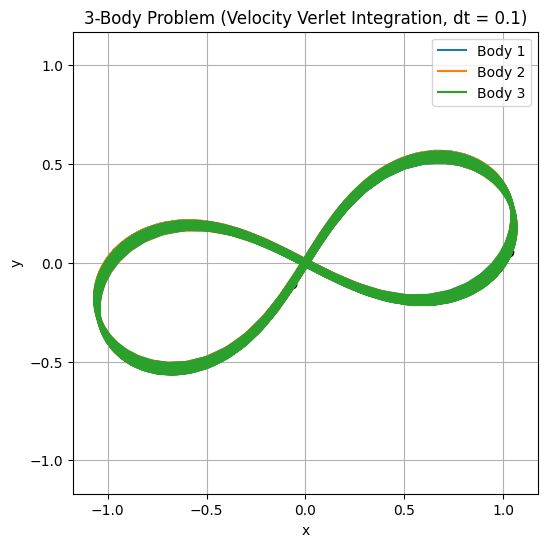

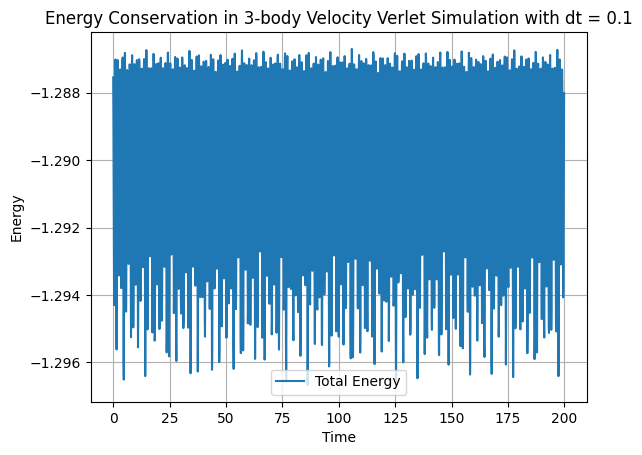

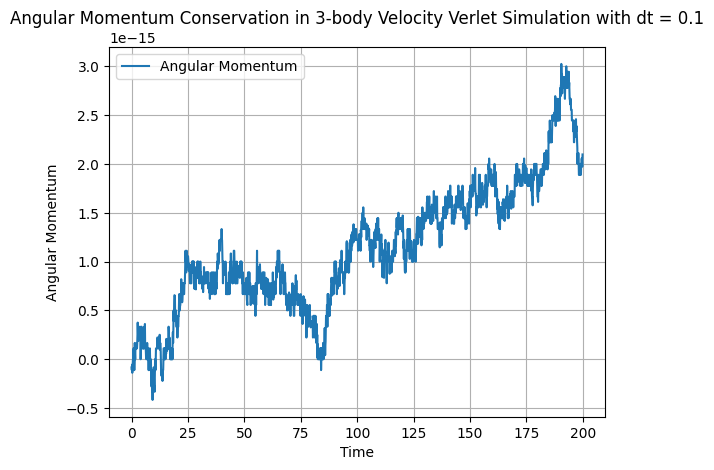

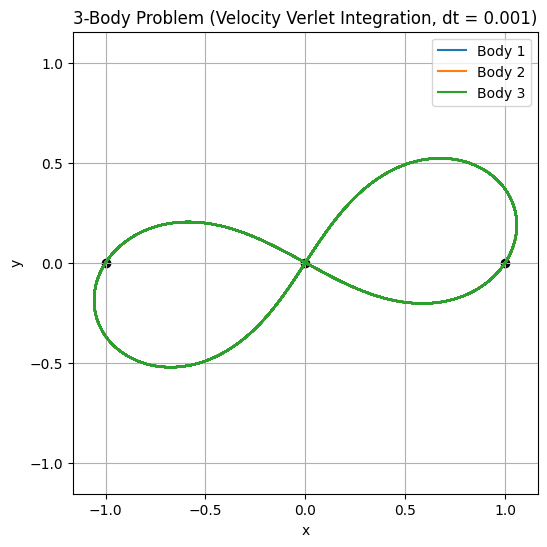

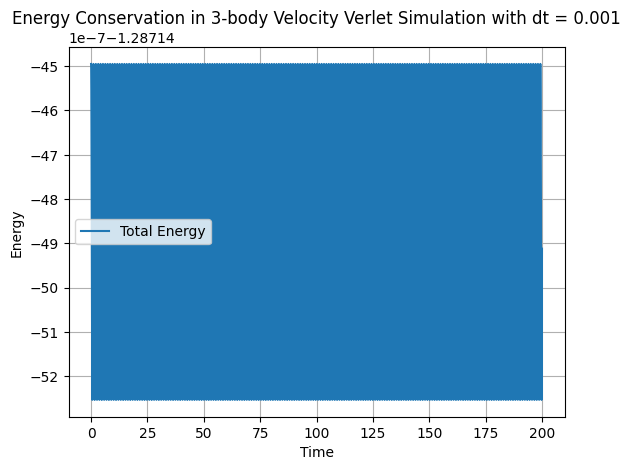

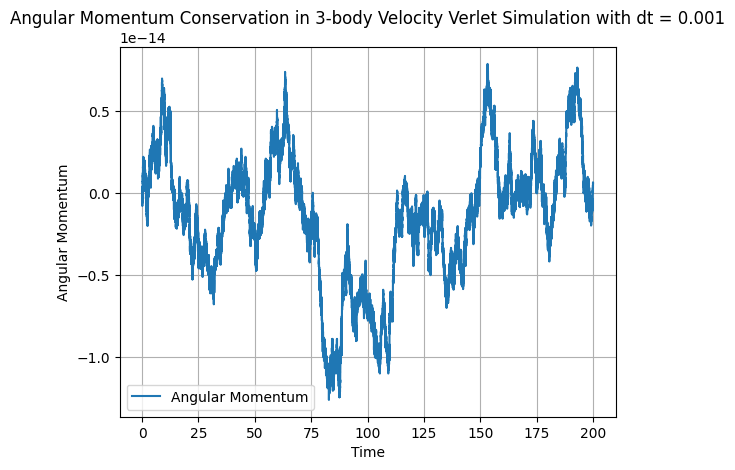

In [5]:
import numpy as np
import matplotlib.pyplot as plt

G = 1
T = 200
dt = np.array([0.1, 0.001])
steps = np.array([int(T/dt[0]), int(T/dt[1])])
p1, p2 = 0.347111, 0.532728
m = np.full(3, 1.0)
r_0 = np.array([[-1.0, 0.0], [1.0, 0.0], [0.0, 0.0]])
r_history1 = np.zeros((3, steps[0], 2), dtype=float)
r_history2 = np.zeros((3, steps[1], 2), dtype=float)
v_0 = np.array([[p1, p2], [p1, p2], [-2*p1, -2*p2]])
def acceleration(r, m):
    acc = np.zeros((3, 2), dtype=float)
    for i in range(3):
        for j in range(3):
            if i != j:
                r_vec = r[j] - r[i]
                dist = np.sqrt(r_vec[0]**2 + r_vec[1]**2)
                if dist > 0:
                    acc[i] += G * m[j] * r_vec / dist**3
    return acc
p = m[0] * v_0[0] + m[1] * v_0[1] + m[2] * v_0[2]
v_com = p / np.sum(m)
v_0 -= v_com
E_history1 = np.zeros(steps[0])
L_history1 = np.zeros(steps[0])
E_history2 = np.zeros(steps[1])
L_history2 = np.zeros(steps[1])

def total_energy(r, v, m):
    T = 0.5 * np.sum(m[:, None] * np.sum(v*v, axis=1, keepdims=True))
    U = 0.0
    N = len(m)
    for i in range(N):
        for j in range(i+1, N):  # avoid double counting
            U -= G * m[i] * m[j] / np.linalg.norm(r[i] - r[j])
    return T + U

def total_angular_momentum(r, v, m):
    cross_terms = r[:,0]*v[:,1] - r[:,1]*v[:,0]
    L = np.sum(m * cross_terms)
    return L

r = r_0.copy()
v = v_0.copy()
a = acceleration(r, m)

# --- Velocity Verlet integration --- [0]
for i in range(steps[0]):
    r += v * dt[0] + 0.5 * a * dt[0]**2
    a_new = acceleration(r, m)
    v += 0.5 * (a + a_new) * dt[0]
    a = a_new
    r_history1[:, i, :] = r
    E_history1[i] = total_energy(r, v, m)
    L_history1[i] = total_angular_momentum(r, v, m)

r = r_0.copy()
v = v_0.copy()
a = acceleration(r, m)

# --- Velocity Verlet integration --- [1]
for i in range(steps[1]):
    r += v * dt[1] + 0.5 * a * dt[1]**2
    a_new = acceleration(r, m)
    v += 0.5 * (a + a_new) * dt[1]
    a = a_new
    r_history2[:, i, :] = r
    E_history2[i] = total_energy(r, v, m)
    L_history2[i] = total_angular_momentum(r, v, m)

time = [np.arange(steps[i]) * dt[i] for i in range(len(dt))]

print(E_history1)
print(E_history2)
print(L_history1)
print(L_history2)

plt.figure(figsize=(6,6))
for i in range(3):
    plt.plot(r_history1[i, :, 0], r_history1[i, :, 1], label=f'Body {i+1}')
    plt.scatter(r_history1[i, 0, 0], r_history1[i, 0, 1], marker='o', c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('3-Body Problem (Velocity Verlet Integration, dt = 0.1)')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()
plt.figure()
plt.plot(time[0], E_history1, label="Total Energy")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Energy Conservation in 3-body Velocity Verlet Simulation with dt = 0.1")
plt.grid()
plt.legend()
plt.show()
plt.figure()
plt.plot(time[0], L_history1, label="Angular Momentum")
plt.xlabel("Time")
plt.ylabel("Angular Momentum")
plt.title("Angular Momentum Conservation in 3-body Velocity Verlet Simulation with dt = 0.1")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
for i in range(3):
    plt.plot(r_history2[i, :, 0], r_history2[i, :, 1], label=f'Body {i+1}')
    plt.scatter(r_history2[i, 0, 0], r_history2[i, 0, 1], marker='o', c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('3-Body Problem (Velocity Verlet Integration, dt = 0.001)')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()
plt.figure()
plt.plot(time[1], E_history2, label="Total Energy")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Energy Conservation in 3-body Velocity Verlet Simulation with dt = 0.001")
plt.grid()
plt.legend()
plt.show()
plt.figure()
plt.plot(time[1], L_history2, label="Angular Momentum")
plt.xlabel("Time")
plt.ylabel("Angular Momentum")
plt.title("Angular Momentum Conservation in 3-body Velocity Verlet Simulation with dt = 0.001")
plt.grid()
plt.legend()
plt.show()

#### Commentary:
First, we can see that the Velocity Verlet with dt = 0.001 achieved the best accuracy of all simulations. It is the closest in values to the website.  
These integrators work differently and we can classify them under two criteria:  
1. Symplectic?  
2. What order?  

Let's look at Euler's Forward method first:  
As we compare the method's formula to the true full formula (Taylor series), we can see that Euler's drops the $(Δt)^2$, which means that it's first-order and its global error is $O(Δt)$. But what does that even mean?  
It means that for every decrease in the step the error decreases linearly too.  
Now, is it Symplectic? No it isn't, as it doesn't follow Hamiltonian mechanics, which makes it distort energy and angular momentum across time (either decaying or increasing energy out of nowhere) leading the simulation to collapse just after some time. (The planets drift away or crash).  

Second, Runge-Kutta $2^{\text{nd}}$ order (RK2):  
We can see that RK2 is second-order as it drops expressions after $(Δt)^2$, so that is its global error. It means that for every decrease in the step the error decreases quadratically instead, which greatly increases efficiency.  
RK2 also isn't Symplectic, so it distorts energy just the same as Forward Euler but after much longer times.  

Third, Velocity Verlet:  
It is second-order and Symplectic. This makes it the most efficient of the three integrators here.

### Problem 2: REBOUND Flower

In [8]:
pip install rebound

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.2/793.2 kB 16.0 MB/s eta 0:00:00


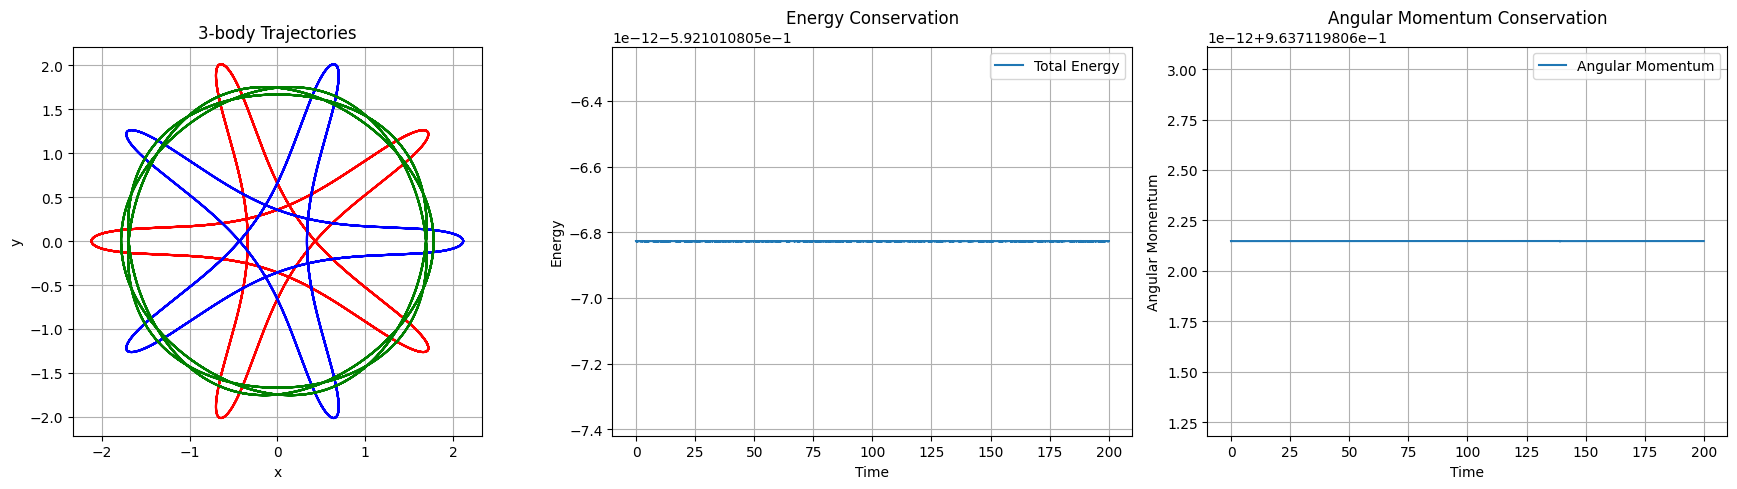

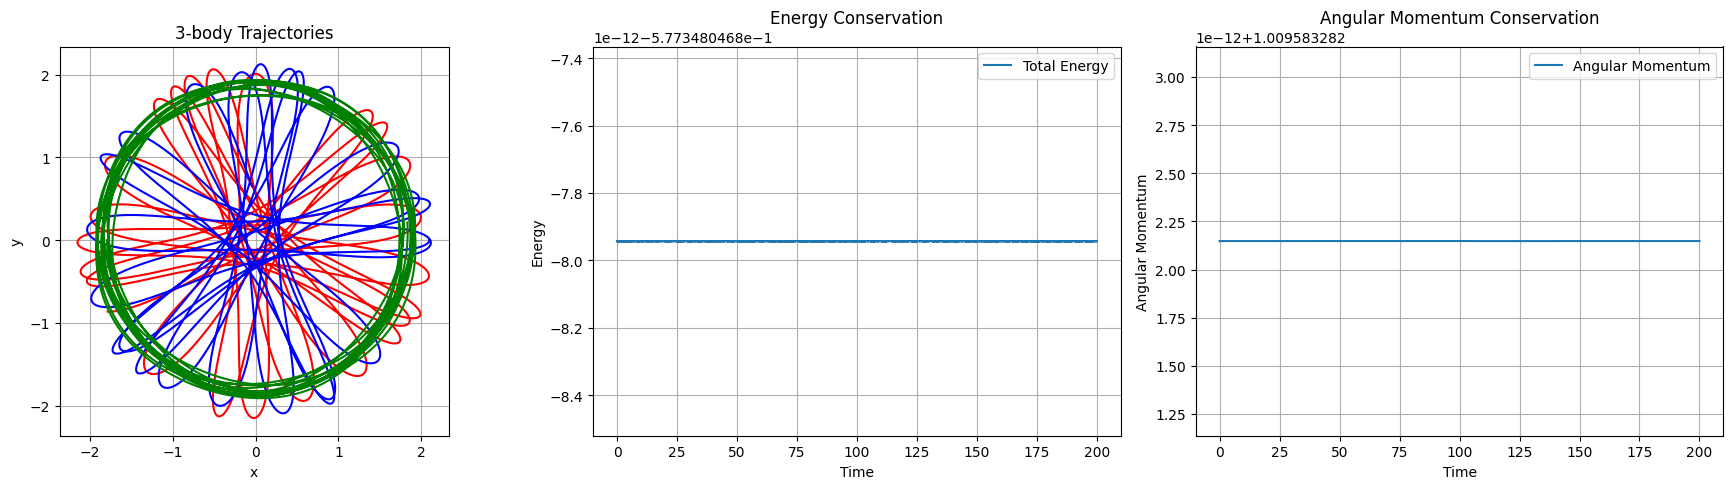

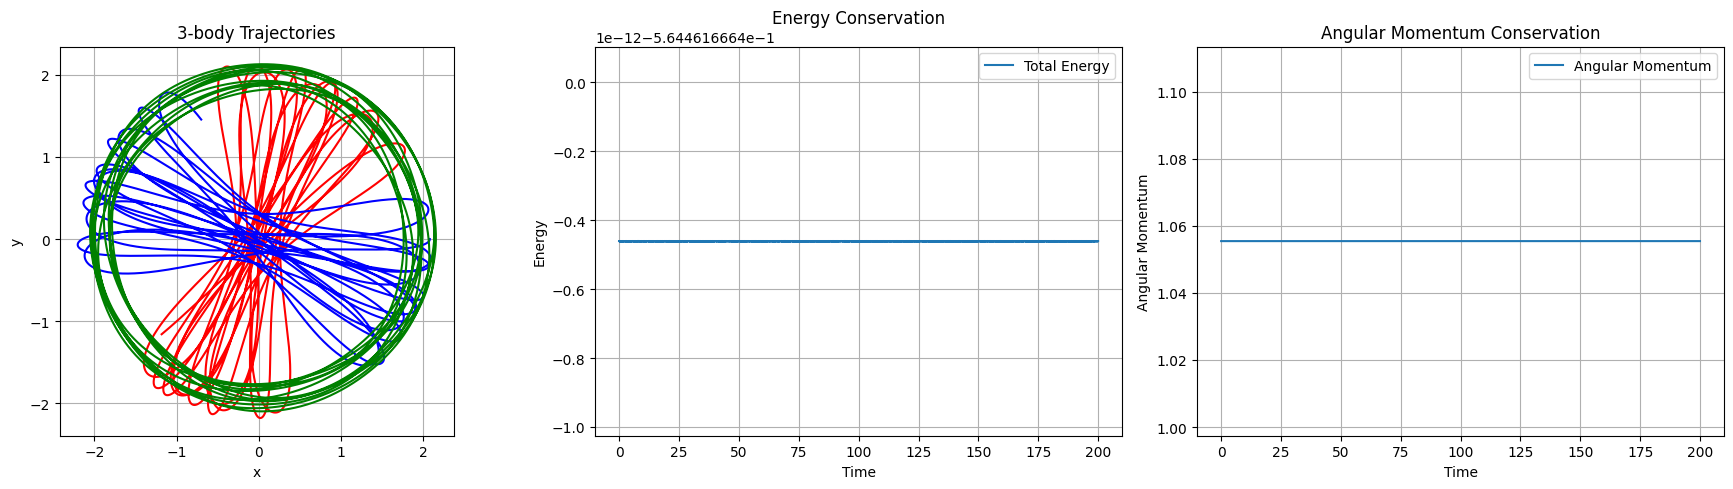

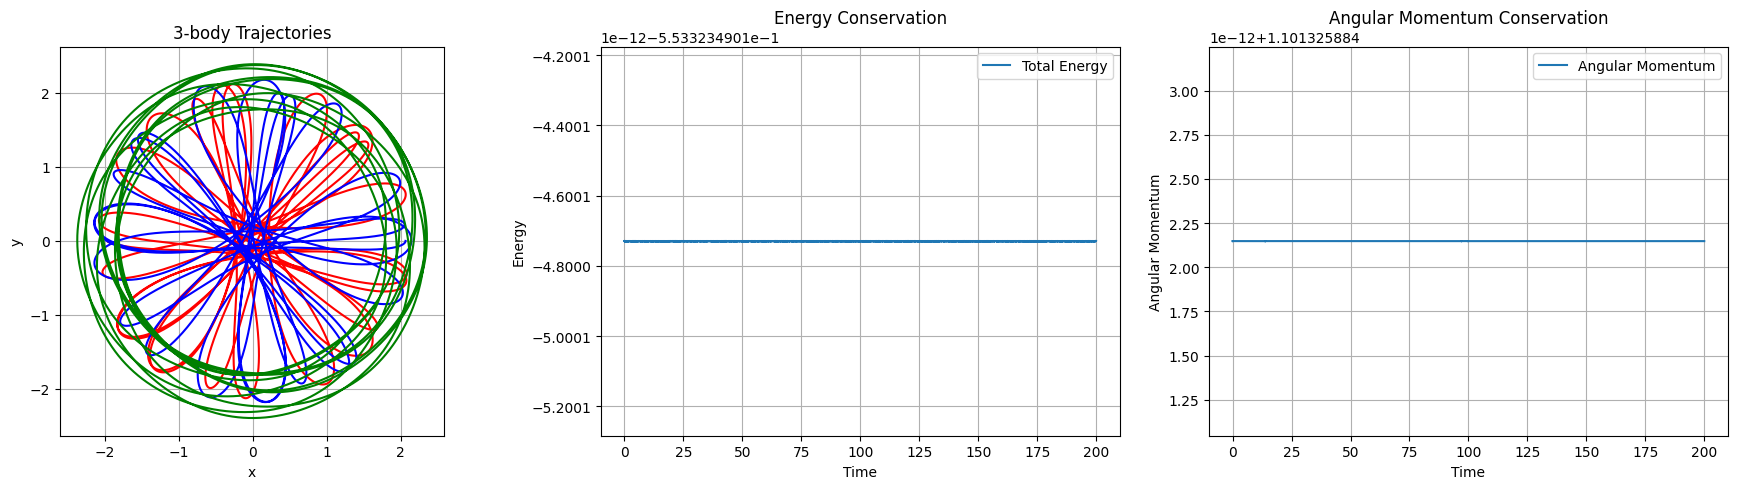

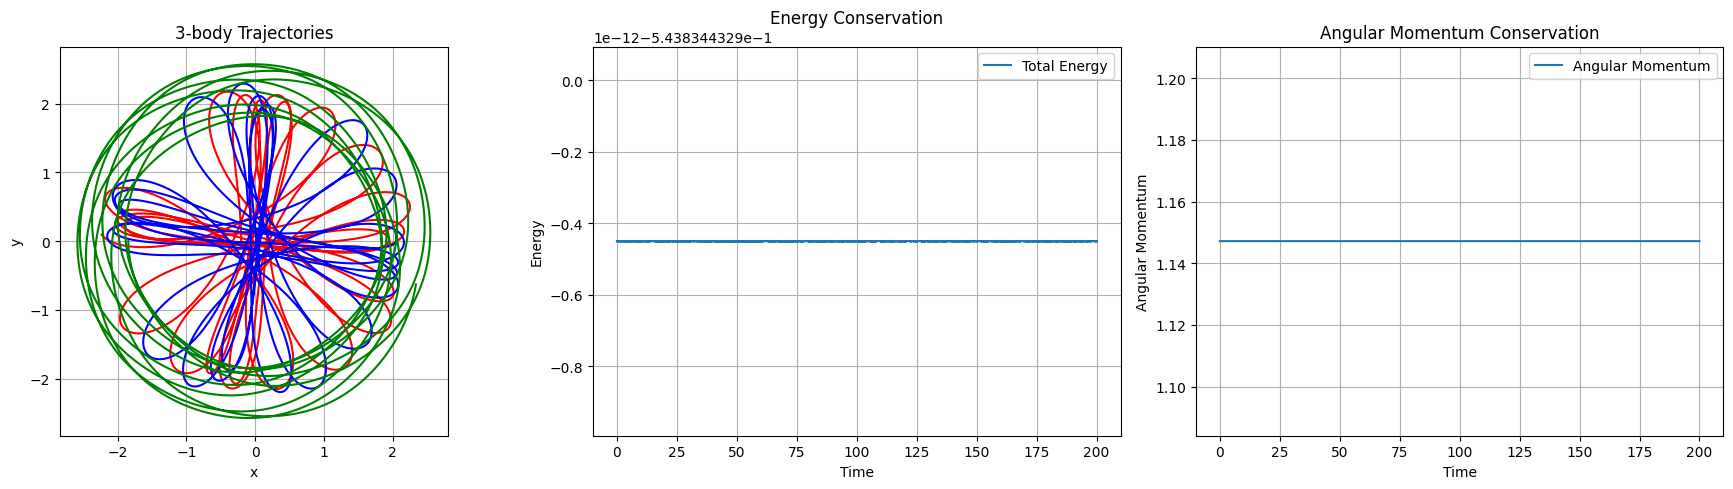

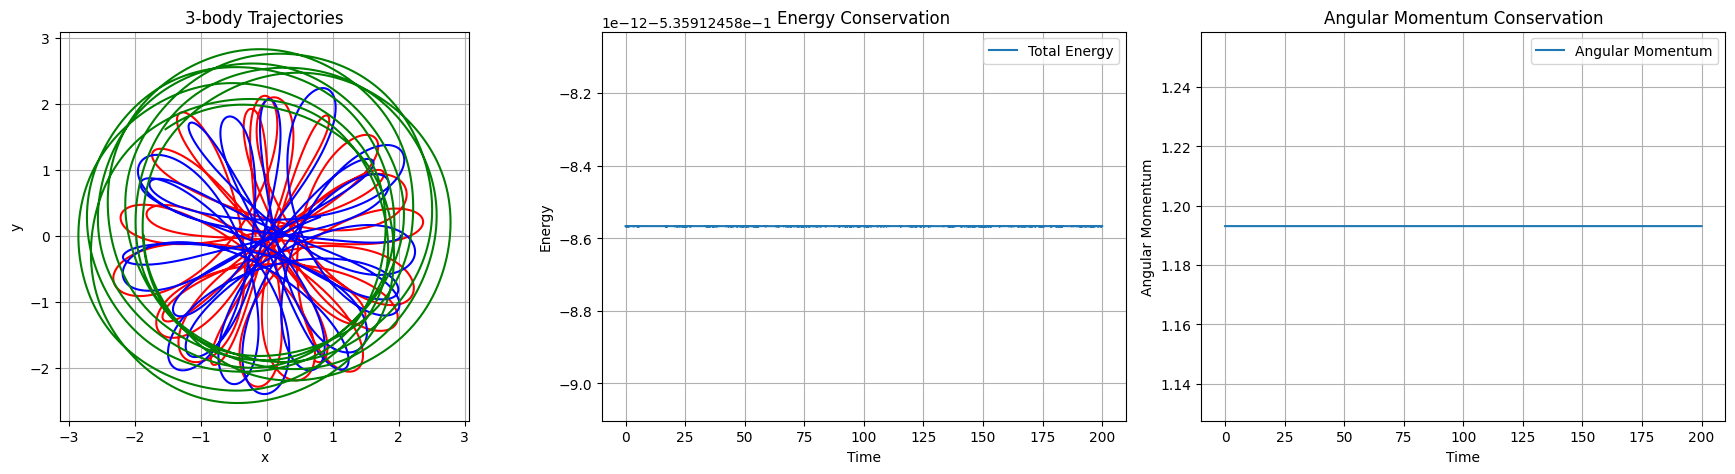

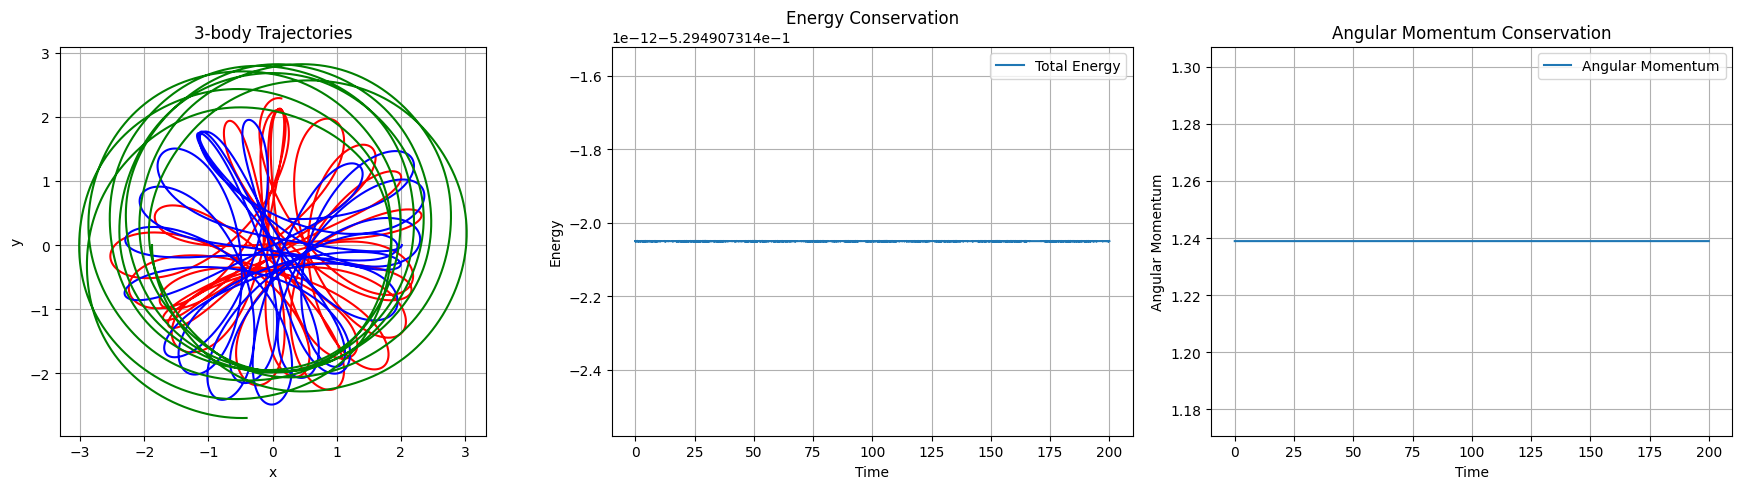

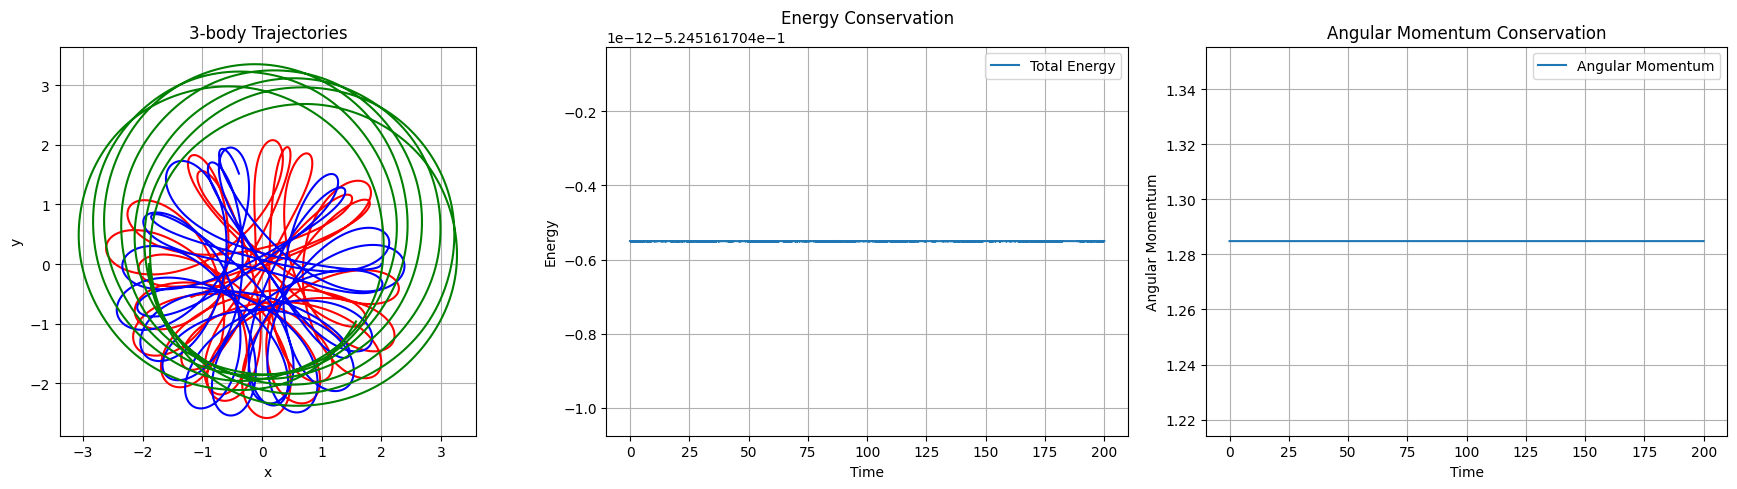

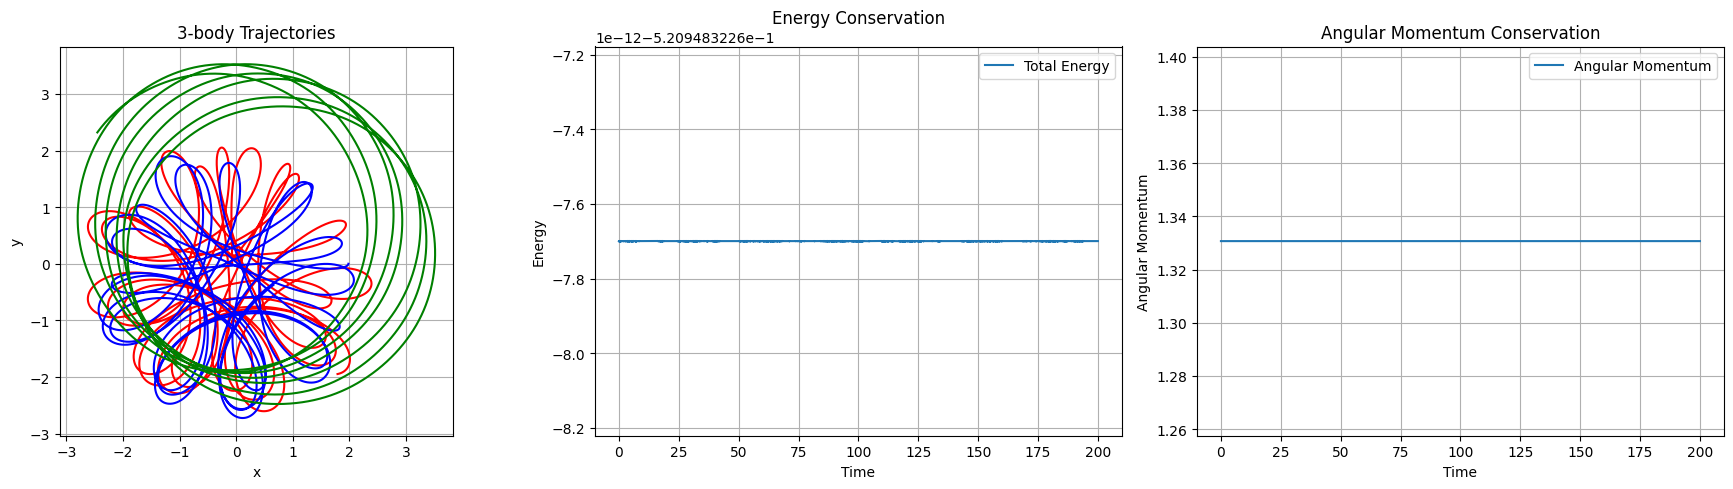

In [ ]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

T = 200.0
dt = 0.001
time = np.arange(0, T, dt)
steps = int(T/dt)
x_values = np.arange(-0.3370767020, -0.3370767020 + 0.05*11, 0.05)

def total_energy(sim):
    m = np.array([p.m for p in sim.particles])
    r = np.array([[p.x, p.y] for p in sim.particles])
    v = np.array([[p.vx, p.vy] for p in sim.particles])

    T = 0.5 * np.sum(m[:, None] * np.sum(v*v, axis=1, keepdims=True))
    U = 0.0
    N = len(m)
    for i in range(N):
        for j in range(i+1, N):
            U -= G * m[i] * m[j] / np.linalg.norm(r[i] - r[j])
    return T + U

def total_angular_momentum(sim):
    m = np.array([p.m for p in sim.particles])
    r = np.array([[p.x, p.y] for p in sim.particles])
    v = np.array([[p.vx, p.vy] for p in sim.particles])
    cross_terms = r[:,0]*v[:,1] - r[:,1]*v[:,0]
    L = np.sum(m * cross_terms)
    return L

for x_0 in x_values:
    sim = rebound.Simulation()
    sim.add(m=1.0, x=x_0, vy=0.9174260238)
    sim.add(m=1.0, x=2.1164029743, vy=-0.0922665014)
    sim.add(m=1.0, x=-1.7793262723, vy=-0.8251595224)

    sim.move_to_com()

    r_history = np.zeros((3, steps, 2))
    E = np.zeros(steps)
    L = np.zeros(steps)

    for i, t in enumerate(time):
        sim.integrate(t)
        for j, p in enumerate(sim.particles):
            r_history[j, i, 0] = p.x
            r_history[j, i, 1] = p.y
        E[i] = total_energy(sim)
        L[i] = total_angular_momentum(sim)

    colors = ['red', 'blue', 'green']
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    for i in range(3):
        axs[0].plot(r_history[i, :, 0], r_history[i, :, 1], color=colors[i])
    axs[0].set_aspect('equal')
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")
    axs[0].set_title("3-body Trajectories")
    axs[0].grid(True)

    axs[1].plot(time, E, label="Total Energy")
    axs[1].set_xlabel("Time")
    axs[1].set_ylabel("Energy")
    axs[1].set_title("Energy Conservation")
    axs[1].grid(True)
    axs[1].legend()

    axs[2].plot(time, L, label="Angular Momentum")
    axs[2].set_xlabel("Time")
    axs[2].set_ylabel("Angular Momentum")
    axs[2].set_title("Angular Momentum Conservation")
    axs[2].grid(True)
    axs[2].legend()

    plt.tight_layout()
    plt.show()

Since 3-body problems are non-linear, a tiny change in the initial positions might induce drastic changes in the results. This small change in the mass affects everything from force to angular momentum.